### Overview

In [ ]:
## The objective of this analysis is the evaluation of the sales of Electric Vehicles (EV's) in the state of Washington.
## Sales sensitiviy analyses are done along several dimensions including:
    ## Battery Range
    ## Vehicle Price
    ## Population
    ## Distance of Travel (Surface Area of Vehicle Home Location)
    ## Availability of Charging Stations outside the home
    
## More focused analysis will be done on the top five EV makes that currently hold over 80% of the market share

## Recommendations will be made to guide further R&D and Product Development decisions regarding features vs range.

## Data Analysts:
    ## F. A. Barillas
    ## M. Morales

### Sources of Data

In [2]:
## Electric Vehicle dataset was obtained at data.gov: https://catalog.data.gov/dataset/electric-vehicle-population-data
## Electric Vehicle Charging Stations data: https://chargehub.com/en/countries/united-states/washington/seattle.html
## Electric Rates Per City in Washington State: https://www.electricitylocal.com/states/washington
## Washington State City and County Demographics: https://www.washington-demographics.com/counties_by_population

### Electric Vehicles Categories

In [3]:
## There are two types of electric vehicles captured in the dataset from data.gov.  They are:
    ## Battery Electric Vehicles - entirely fueled by an battery banks
    ## Plug-in Hybrid Electric Vehicle - fueled by batteries and an additional fuel (gasoline, diesel, ethanol)
    
## This project will focused on BEV's although some comparisons will be made with PHEV data for context definition

### Dependencies and Set up

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

import matplotlib.ticker as ticker
import pprint
import re 

pd.options.display.float_format = "{:,.3f}".format

In [5]:
# Reading the datafiles
EV_raw_data = pd.read_csv("Wash_State_EV_PHEV_Data.csv")
County_demo_data = pd.read_csv("Wash_State_County_Demo_Data.csv")

Rates_Population = "Wash_State_County_Demo_Data.csv"
Rates_Population_df = pd.read_csv(Rates_Population)

In [6]:
EV_raw_data = pd.DataFrame(EV_raw_data)
EV_raw_data.head()

,City,County,ZIP Code,VIN,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP,Legislative_District,DOL_ID,Vehicle_Location
0,AUBURN,King,98001,5YJYGDEEXL,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000",30.000,"114,288,233.000",POINT (-122.266685 47.308313)
1,AUBURN,King,98001,WVWKR7AU1K,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),125.000,"32,790.000",47.000,"331,142,717.000",POINT (-122.266685 47.308313)
2,AUBURN,King,98001,5YJYGDEE1L,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000",47.000,"112,961,761.000",POINT (-122.266685 47.308313)
3,AUBURN,King,98001,1N4AZ1BP2L,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.000,"31,620.000",30.000,"132,473,834.000",POINT (-122.266685 47.308313)
4,AUBURN,King,98001,5YJSA1H11E,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.000,"69,900.000",30.000,"2,267,016.000",POINT (-122.266685 47.308313)


In [7]:
# Release unneeded columns from EV_raw_data

In [8]:
EV_raw_data.drop(["VIN","Legislative_District","DOL_ID","Vehicle_Location"],axis=1,inplace=True)

In [9]:
EV_raw_data

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
0,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
1,AUBURN,King,98001,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),125.000,"32,790.000"
2,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
3,AUBURN,King,98001,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.000,"31,620.000"
4,AUBURN,King,98001,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.000,"69,900.000"
...,...,...,...,...,...,...,...,...,...
64427,CLARKSTON,Asotin,99403,2016,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),27.000,"34,600.000"
64428,CLARKSTON,Asotin,99403,2012,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),6.000,"32,000.000"
64429,CLARKSTON,Asotin,99403,2020,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),25.000,"27,600.000"
64430,CLARKSTON,Asotin,99403,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38.000,"34,185.000"


In [10]:
Rates_Population_df.head(20)

,County,Land_Surface_Area,Population,Public_Charging_Station,EVs_Per_County,Electric_Cost_KWhr
0,Adams,"1,924.980",18951,3,8,7.650
1,Asotin,636.210,21955,1,13,9.050
2,Benton,"1,700.380",182053,16,443,7.510
3,Chelan,"2,920.520",73664,14,263,3.220
4,Clallam,"1,738.330",72024,19,280,7.800
5,Clark,629.000,438272,58,2284,9.180
6,Columbia,868.630,4031,7,5,8.230
7,Cowlitz,"1,140.120",102072,31,179,7.290
8,Douglas,"1,819.260",39183,4,87,2.640
9,Ferry,"2,203.160",7657,1,7,9.370


In [11]:
Rates_Population_df.columns

Index(['County', 'Land_Surface_Area', 'Population', 'Public_Charging_Station',
       'EVs_Per_County', 'Electric_Cost_KWhr'],
      dtype='object')

In [12]:
# Compare Cars by Type of Electric Vehicle
    # BoxPlot of Range
    # BoxPlot of Price

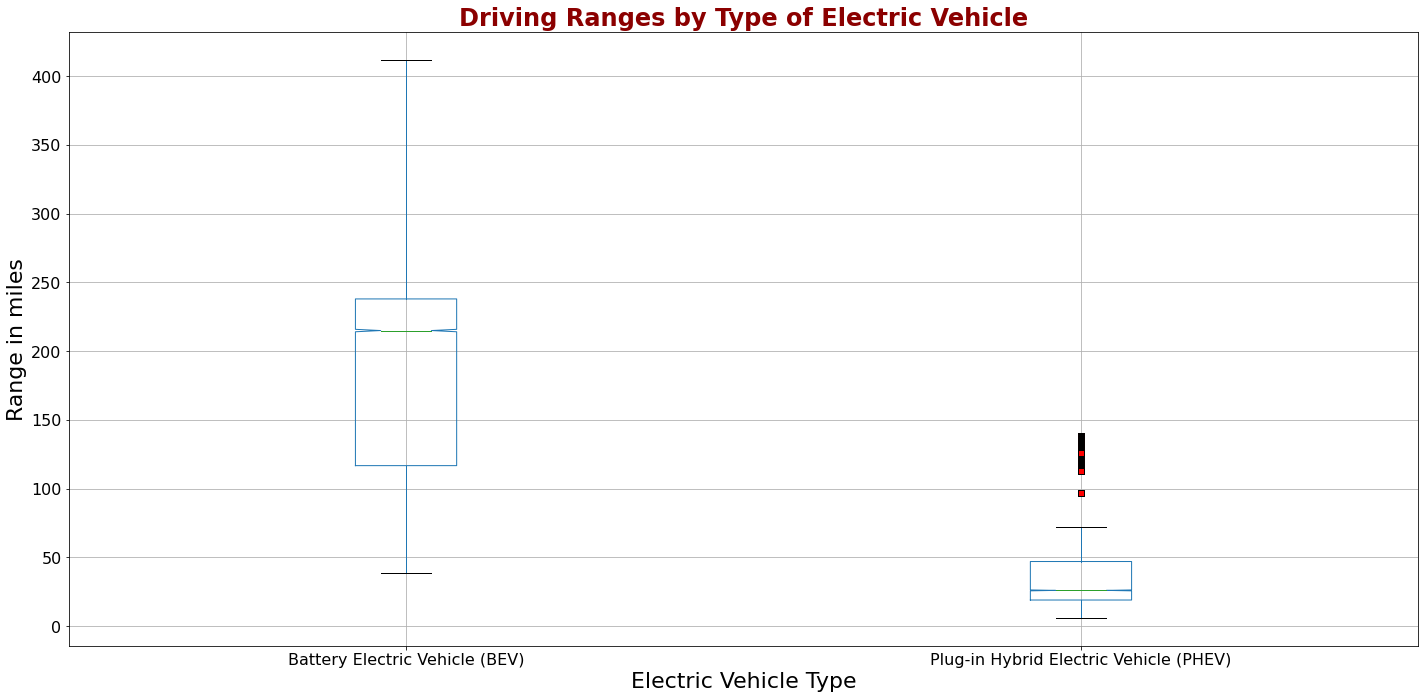

In [146]:
# BoxPlot of Driving Range Based on Vehicle Type

red_square = dict(markerfacecolor = 'r', marker ='s')

EV_raw_data.boxplot("Electric_Range", by="EV_Type", figsize = (20,10), notch = True, flierprops = red_square)

plt.title("Driving Ranges by Type of Electric Vehicle",fontdict ={"fontsize":24, "color": 'darkred', "weight":'bold'})
plt.suptitle("")
plt.xlabel("Electric Vehicle Type", fontdict={"fontsize":22})
plt.ylabel("Range in miles", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)

plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("BEV_vs_PHEV_Range.png")
plt.show()


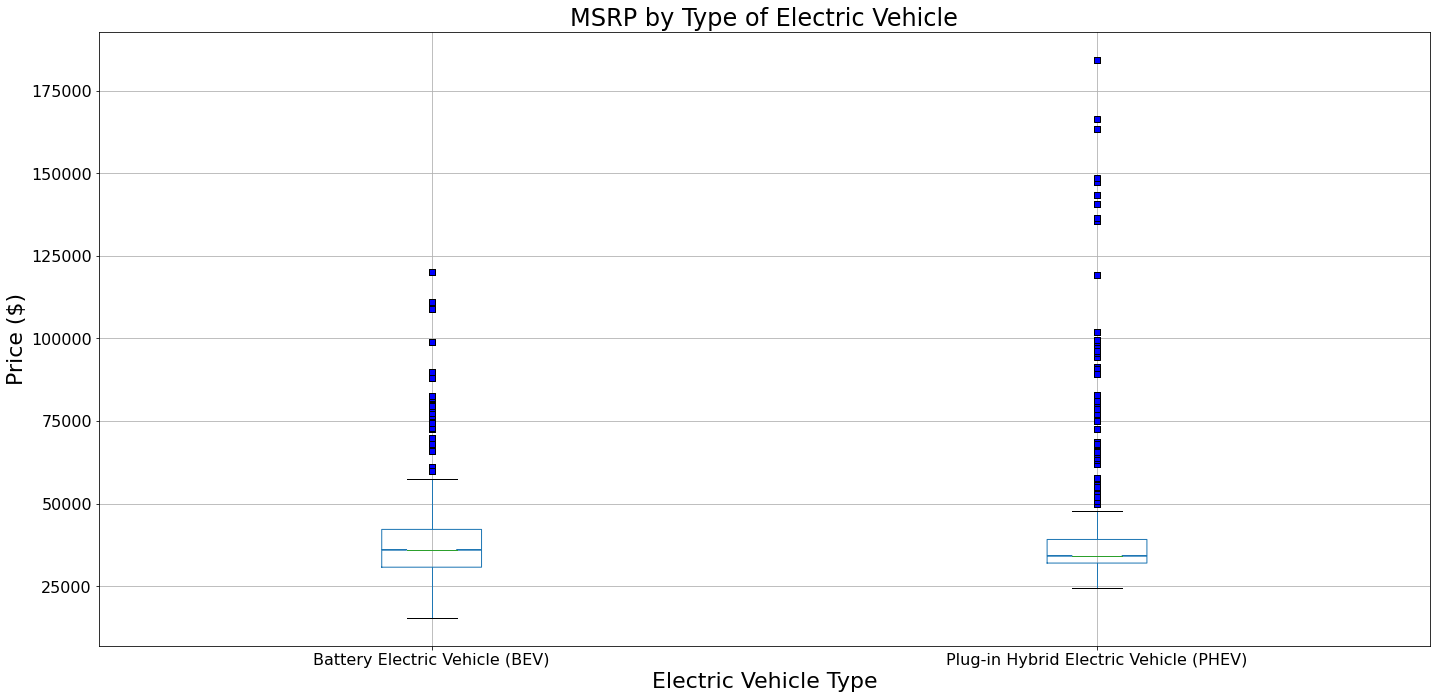

In [147]:
# BoxPlot of Price Range Based on Vehicle Type

blue_square = dict(markerfacecolor = 'b', marker ='s')

EV_raw_data.boxplot("Base_MSRP", by="EV_Type", figsize = (20,10), notch = True, flierprops = blue_square)

plt.title("MSRP by Type of Electric Vehicle",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Electric Vehicle Type", fontdict={"fontsize":22})
plt.ylabel("Price ($)", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("BEV_vs_PHEV_MSRP.png")
plt.show()


### Separate Battery Electric Vehicles and Plug-in Hybrid Electric Vehicles into two datasets

In [15]:
BEV_df = EV_raw_data[EV_raw_data.EV_Type== "Battery Electric Vehicle (BEV)"]
BEV_df

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
0,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
1,AUBURN,King,98001,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),125.000,"32,790.000"
2,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
3,AUBURN,King,98001,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.000,"31,620.000"
4,AUBURN,King,98001,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.000,"69,900.000"
...,...,...,...,...,...,...,...,...,...
46000,CLARKSTON,Asotin,99403,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75.000,"28,800.000"
46001,CLARKSTON,Asotin,99403,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238.000,"79,500.000"
46002,CLARKSTON,Asotin,99403,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322.000,"39,190.000"
46003,CLARKSTON,Asotin,99403,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),151.000,"29,990.000"


In [16]:
PHEV_df = EV_raw_data[EV_raw_data.EV_Type== "Plug-in Hybrid Electric Vehicle (PHEV)"]
PHEV_df

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
46005,BELLEVUE,King,98015,2017,BMW,X5 XDRIVE40E,Plug-in Hybrid Electric Vehicle (PHEV),14.000,"63,200.000"
46006,PAWCATUCK,New London,6379,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38.000,"34,185.000"
46007,HADDONFIELD,Camden,8033,2019,HYUNDAI,IONIQ PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),29.000,"25,350.000"
46008,SILVER SPRING,Montgomery,20906,2015,FORD,FUSION ENERGI,Plug-in Hybrid Electric Vehicle (PHEV),19.000,"34,800.000"
46009,ANNAPOLIS,Anne Arundel,21401,2012,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),6.000,"32,000.000"
...,...,...,...,...,...,...,...,...,...
64427,CLARKSTON,Asotin,99403,2016,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),27.000,"34,600.000"
64428,CLARKSTON,Asotin,99403,2012,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),6.000,"32,000.000"
64429,CLARKSTON,Asotin,99403,2020,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),25.000,"27,600.000"
64430,CLARKSTON,Asotin,99403,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38.000,"34,185.000"


## Breaking Down BEV's Per County

In [17]:
BEV_Per_County_df = BEV_df.groupby("County").Make.count()
BEV_Per_County_df = pd.DataFrame(BEV_Per_County_df)
BEV_Per_County_df= BEV_Per_County_df.reset_index()
BEV_Per_County_df

,County,Make
0,Adams,8
1,Asotin,13
2,Benton,443
3,Chelan,263
4,Clallam,280
5,Clark,2284
6,Columbia,5
7,Cowlitz,179
8,Douglas,87
9,Ferry,7


### BEV'S PER MANUFACTURER

In [18]:
BEV_Per_Make_df = BEV_df.groupby("Make").Model.count()
BEV_Per_Make_df = pd.DataFrame(BEV_Per_Make_df)
BEV_Per_Make_df.reset_index(inplace=True)
new_names = ['Make','Cars']
BEV_Per_Make_df.columns = new_names

BEV_Per_Make_df

,Make,Cars
0,AUDI,395
1,AZURE DYNAMICS,6
2,BMW,513
3,CHEVROLET,3613
4,DODGE,1
5,FIAT,733
6,FORD,288
7,HONDA,1
8,HYUNDAI,205
9,JAGUAR,183


In [19]:
# Create New Column to hold Market Share
Total_cars = BEV_Per_Make_df["Cars"].sum()
Total_cars

46005

In [20]:
BEV_Per_Make_df['Market_Share']=BEV_Per_Make_df['Cars']/Total_cars*100
BEV_Per_Make_df.sort_values(by='Market_Share', ascending = False)

,Make,Cars,Market_Share
17,TESLA,25919,56.340
14,NISSAN,11212,24.371
3,CHEVROLET,3613,7.853
10,KIA,1415,3.076
20,VOLKSWAGEN,956,2.078
5,FIAT,733,1.593
2,BMW,513,1.115
0,AUDI,395,0.859
6,FORD,288,0.626
16,SMART,246,0.535


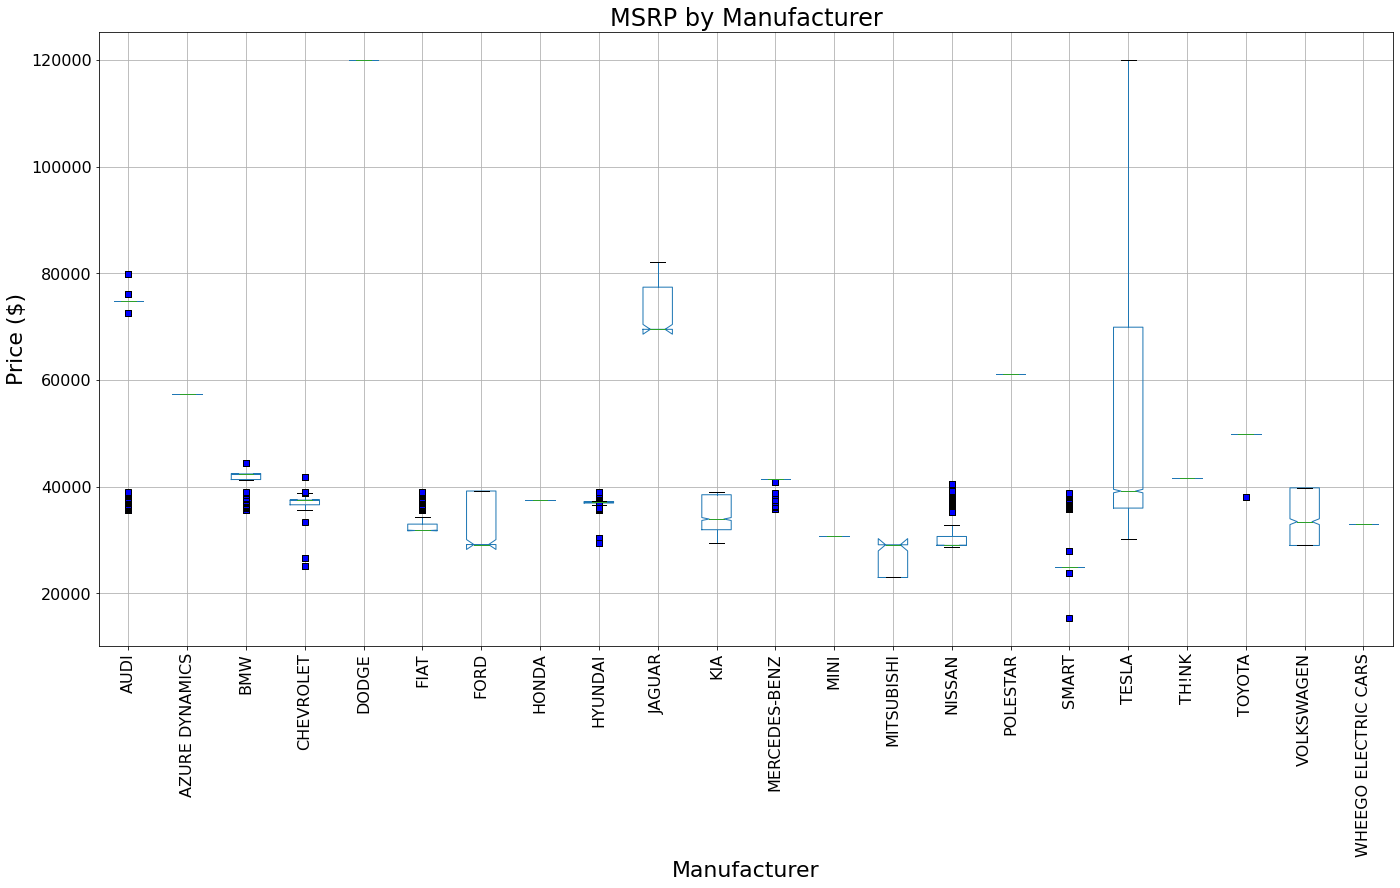

In [148]:
# BoxPlot of MSRP By Manufacturer
yellow_square = dict(markerfacecolor = 'y', marker ='s', size = 40)

BEV_df.boxplot("Base_MSRP", by="Make", figsize = (20,10), notch = True, flierprops = blue_square)

plt.title("MSRP by Manufacturer",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Manufacturer", fontdict={"fontsize":22})
plt.ylabel("Price ($)", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 16, color = 'k', rotation = 90)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("MSRP_By_Make_Box.png")
plt.show()


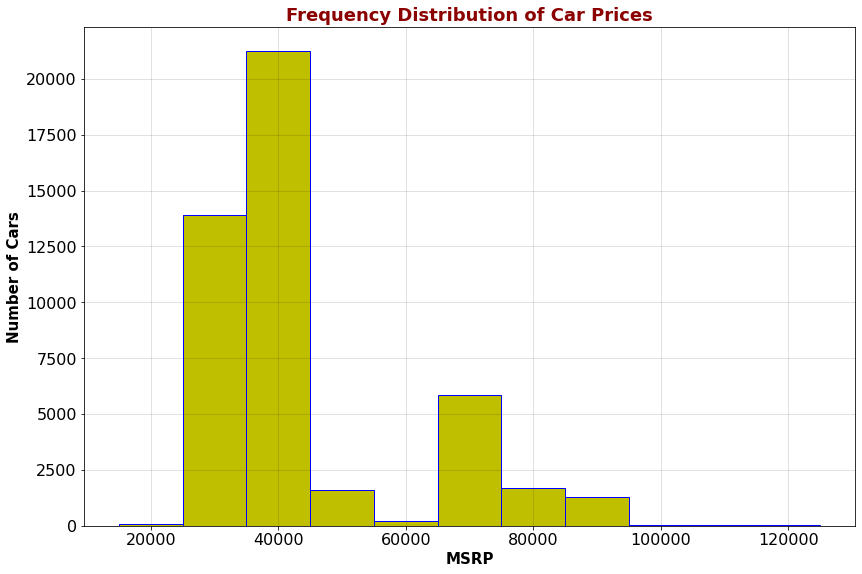

In [149]:
## Frequency Distribution of Car Prices (MSRP)

prices = BEV_df['Base_MSRP']
bins = [15000, 25000, 35000,45000,55000,65000,75000,85000,95000,105000,115000,125000]

fig3 = plt.figure(figsize =(12,8))

plt.title("Frequency Distribution of Car Prices", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("MSRP", fontsize = 15, fontweight ='bold')
plt.ylabel("Number of Cars", fontsize = 15, fontweight ='bold')

plt.hist(prices, bins=bins, edgecolor = 'b', facecolor = 'y')
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("MSRP_Histogram.png")
plt.show()


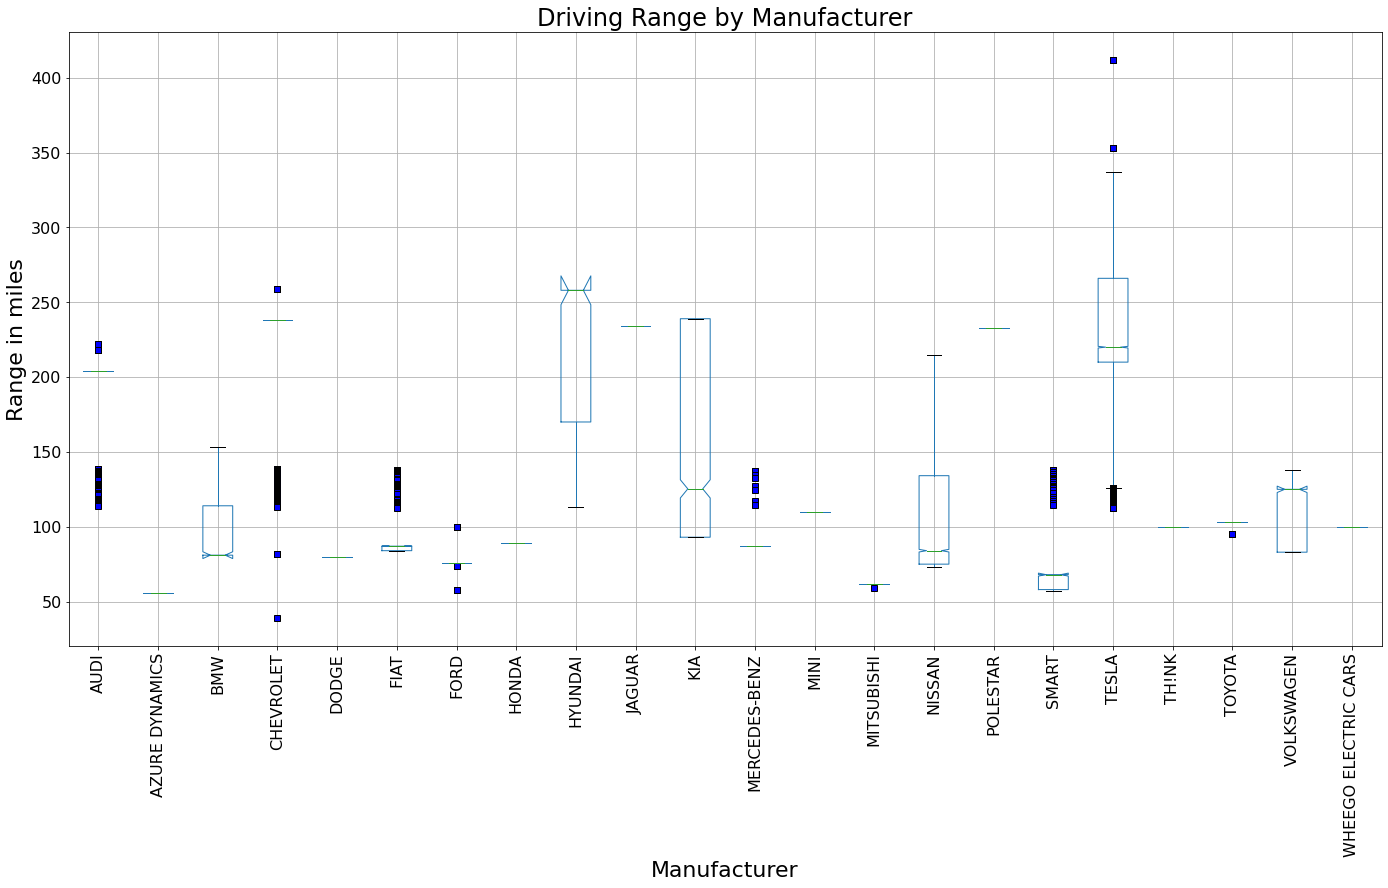

In [150]:
# BoxPlot of Range By Manufacturer
yellow_square = dict(markerfacecolor = 'y', marker ='s', size = 40)

BEV_df.boxplot("Electric_Range", by="Make", figsize = (20,10), notch = True, flierprops = blue_square)

plt.title("Driving Range by Manufacturer",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Manufacturer", fontdict={"fontsize":22})
plt.ylabel("Range in miles", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 16, color = 'k', rotation = 90)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("Range_by_Make.png")
plt.show()

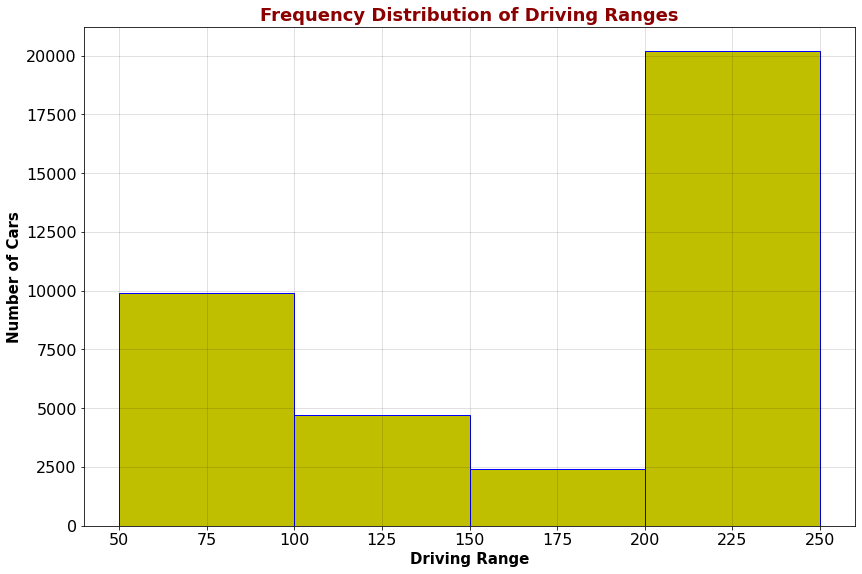

In [151]:
## Frequency Distribution of Driving Range

ranges = BEV_df['Electric_Range']
bins = [50,100,150,200,250]

fig3 = plt.figure(figsize =(12,8))

plt.title("Frequency Distribution of Driving Ranges", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Driving Range", fontsize = 15, fontweight ='bold')
plt.ylabel("Number of Cars", fontsize = 15, fontweight ='bold')

plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.hist(ranges, bins=bins, edgecolor = 'b', facecolor = 'y')

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("DrivingRange_Histogram.png")
plt.show()



In [21]:
## Calculating the Mean Range and Mean MSRP Per BEV Manufacturer

Range_Per_Make = BEV_df.groupby('Make').Electric_Range.mean()
Range_Per_Make = pd.DataFrame(Range_Per_Make)
Range_Per_Make.reset_index(inplace=True)
new_names1 = ['Make','Mean_Range']
Range_Per_Make.columns = new_names1

MSRP_Per_Make =  BEV_df.groupby('Make').Base_MSRP.mean()
MSRP_Per_Make = pd.DataFrame(MSRP_Per_Make)
MSRP_Per_Make.reset_index(inplace=True)
new_names2 = ['Make','Mean_MSRP']
MSRP_Per_Make.columns = new_names2

In [22]:
## Merge Mean MSRP and Mean Range into Car Make Dataset

BEV_Per_Make_df = pd.merge(BEV_Per_Make_df, Range_Per_Make, how="left", on = "Make")

BEV_Per_Make_df = pd.merge(BEV_Per_Make_df, MSRP_Per_Make, how = "left", on = "Make")

In [23]:
BEV_Per_Make_df.sort_values(by='Market_Share', ascending = False)

,Make,Cars,Market_Share,Mean_Range,Mean_MSRP
17,TESLA,25919,56.340,237.276,"50,023.461"
14,NISSAN,11212,24.371,101.692,"30,514.383"
3,CHEVROLET,3613,7.853,228.095,"37,314.982"
10,KIA,1415,3.076,164.223,"34,855.494"
20,VOLKSWAGEN,956,2.078,107.361,"34,597.134"
5,FIAT,733,1.593,89.107,"32,440.890"
2,BMW,513,1.115,94.483,"42,308.961"
0,AUDI,395,0.859,195.650,"70,166.924"
6,FORD,288,0.626,78.375,"33,200.521"
16,SMART,246,0.535,71.622,"26,447.222"


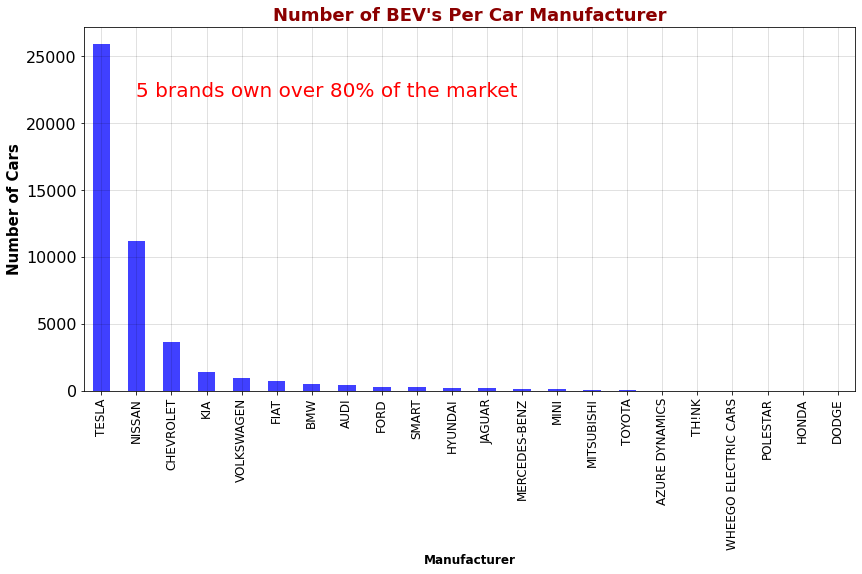

In [152]:
## Number of Cars Per Car Manufacturer Bar Plot
BEV_Per_Make_df.sort_values('Cars', inplace =True, ascending = False)

x_axis = BEV_Per_Make_df['Make']
y_values=BEV_Per_Make_df['Cars']

tick_locations = [value for value in x_axis]

fig1 = plt.figure(figsize =(12,8))

plt.bar(x_axis, y_values, color = 'b', alpha = 0.75, align = "center", width = 0.5)
plt.title("Number of BEV's Per Car Manufacturer", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Manufacturer", fontsize = 12, fontweight ='bold')
plt.ylabel("Number of Cars", fontsize = 15, fontweight ='bold')

plt.xticks(fontsize = 12, color = 'k', rotation = 90)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.xlim(-0.5, len(x_axis)-0.5)

plt.grid(color='k', alpha = 0.15)

plt.annotate("5 brands own over 80% of the market", xy=(1.0,22000.0), size = 20, color ="red")

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("BEVs_Per_Make_Bar.png")
plt.show()



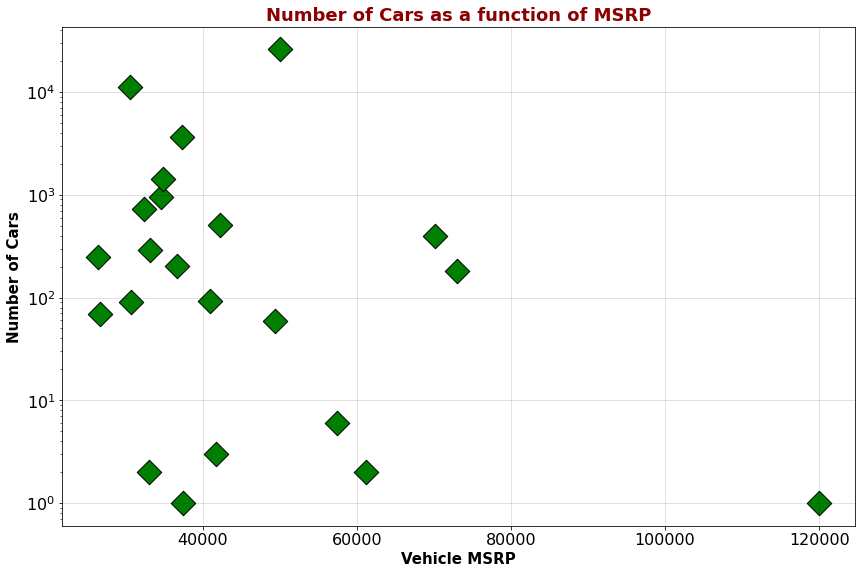

In [153]:
## Scatter Plot of # Cars as a function of Price (MSRP)

BEV_Per_Make_df.sort_values('Mean_MSRP', inplace =True, ascending = True)

x_axis = BEV_Per_Make_df['Mean_MSRP']
y_values=BEV_Per_Make_df['Cars']

fig4 = plt.figure(figsize =(12,8))

plt.scatter(x_axis, y_values, marker ="D", s= 300, facecolor = 'g', edgecolor = 'k', alpha = 1.0)

plt.title("Number of Cars as a function of MSRP", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Vehicle MSRP", fontsize = 15, fontweight ='bold')
plt.ylabel("Number of Cars", fontsize = 15, fontweight ='bold')
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)
plt.yscale("log")

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("BEVs_vs_Price_Scatter.png")
plt.show()



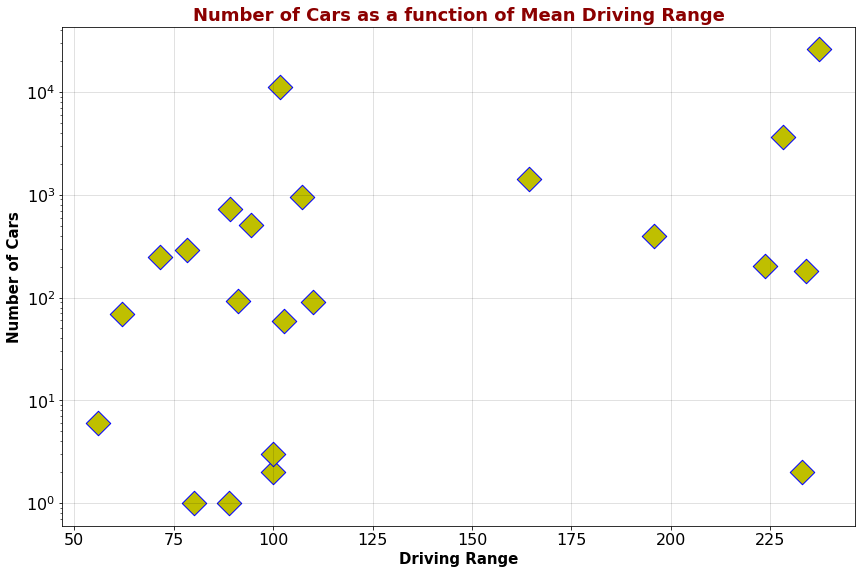

In [154]:
## Scatter Plot of # Cars as a function of Range

BEV_Per_Make_df.sort_values('Mean_Range', inplace =True, ascending = True)

x_axis = BEV_Per_Make_df['Mean_Range']
y_values=BEV_Per_Make_df['Cars']

fig2 = plt.figure(figsize =(12,8))

plt.scatter(x_axis, y_values, marker ="D", s= 300, facecolor = 'y', edgecolor = 'b', alpha = 1.0)

plt.title("Number of Cars as a function of Mean Driving Range", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Driving Range", fontsize = 15, fontweight ='bold')
plt.ylabel("Number of Cars", fontsize = 15, fontweight ='bold')
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)
plt.yscale("log")

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("BEVs_vs_Range_Scatter.png")
plt.show()


### Focusing on the two market leaders

In [29]:
Two_Leaders_df =  BEV_df[(BEV_df['Make']=="TESLA") | (BEV_df['Make']=="NISSAN")]
Two_Leaders_df

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
0,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
2,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
3,AUBURN,King,98001,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.000,"31,620.000"
4,AUBURN,King,98001,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.000,"69,900.000"
6,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
...,...,...,...,...,...,...,...,...,...
45999,CLARKSTON,Asotin,99403,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.000,"35,000.000"
46000,CLARKSTON,Asotin,99403,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75.000,"28,800.000"
46001,CLARKSTON,Asotin,99403,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238.000,"79,500.000"
46002,CLARKSTON,Asotin,99403,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322.000,"39,190.000"


In [30]:
Tesla_df = BEV_df[BEV_df['Make']=="TESLA"]
Tesla_df

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
0,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
2,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
4,AUBURN,King,98001,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.000,"69,900.000"
6,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
7,AUBURN,King,98001,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.000,"69,900.000"
...,...,...,...,...,...,...,...,...,...
45996,ASOTIN,Asotin,99402,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.000,"69,900.000"
45997,CLARKSTON,Asotin,99403,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),330.000,"89,990.000"
45999,CLARKSTON,Asotin,99403,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.000,"35,000.000"
46001,CLARKSTON,Asotin,99403,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238.000,"79,500.000"


In [31]:
Nissan_df = BEV_df[BEV_df['Make']=="NISSAN"]
Nissan_df

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
3,AUBURN,King,98001,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.000,"31,620.000"
18,AUBURN,King,98001,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),84.000,"29,010.000"
28,AUBURN,King,98001,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),151.000,"29,990.000"
32,AUBURN,King,98001,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),73.000,"32,780.000"
37,AUBURN,King,98001,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),73.000,"32,780.000"
...,...,...,...,...,...,...,...,...,...
45993,ASOTIN,Asotin,99402,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),84.000,"28,980.000"
45995,ASOTIN,Asotin,99402,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),84.000,"28,980.000"
45998,CLARKSTON,Asotin,99403,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75.000,"28,800.000"
46000,CLARKSTON,Asotin,99403,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75.000,"28,800.000"


## Comparing the two market leaders

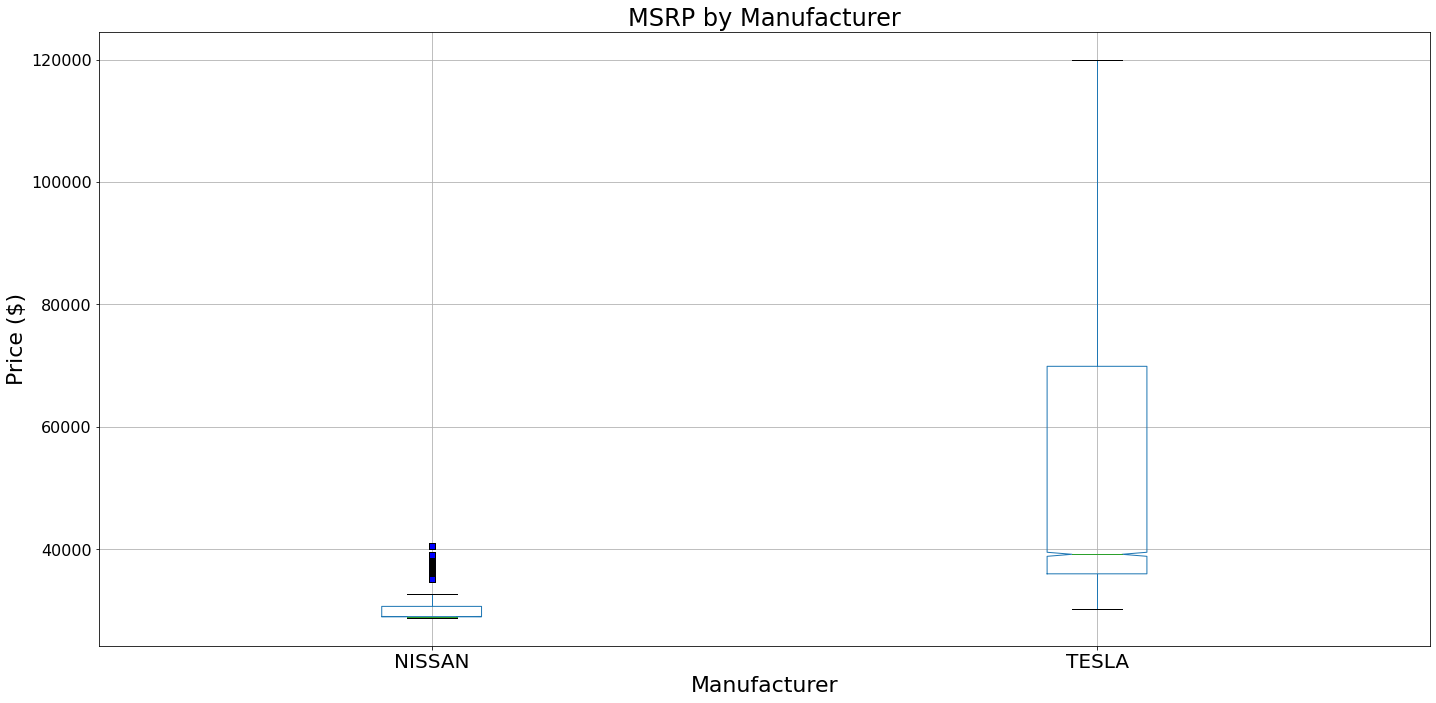

In [155]:
# BoxPlot of Tesla and Nissan Price Ranges

yellow_square = dict(markerfacecolor = 'y', marker ='s', size = 40)

Two_Leaders_df.boxplot("Base_MSRP", by="Make", figsize = (20,10), notch = True, flierprops = blue_square)

plt.title("MSRP by Manufacturer",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Manufacturer", fontdict={"fontsize":22})
plt.ylabel("Price ($)", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)
plt.xticks(fontsize = 20, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("Tesla_Nissan_Price_Box.png")
plt.show()



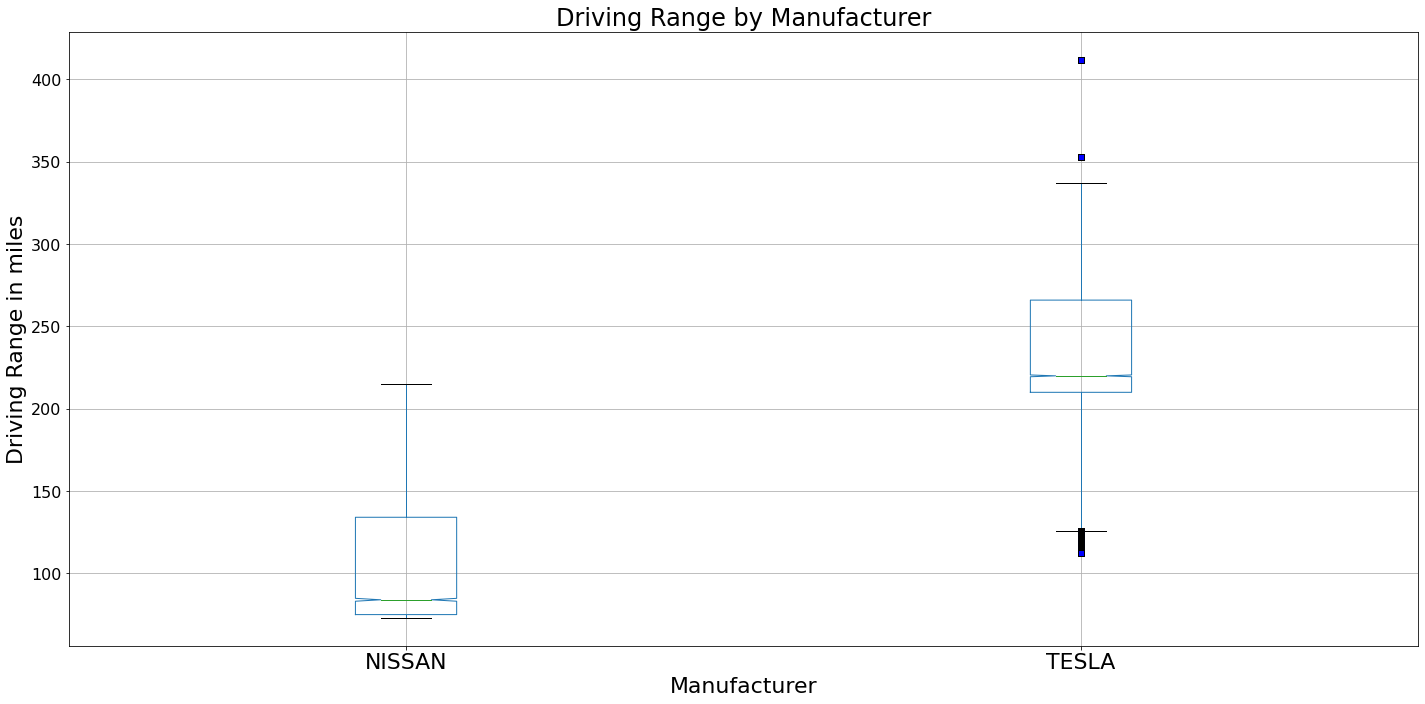

In [156]:
# BoxPlot of Tesla and Nissan Driving Ranges

yellow_square = dict(markerfacecolor = 'y', marker ='s', size = 10)

Two_Leaders_df.boxplot("Electric_Range", by="Make", figsize = (20,10), notch = True, flierprops = blue_square)

plt.title("Driving Range by Manufacturer",fontdict ={"fontsize":24})
plt.suptitle("")
plt.xlabel("Manufacturer", fontdict={"fontsize":22})
plt.ylabel("Driving Range in miles", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)

plt.xticks(fontsize = 22, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.savefig("Tesla_Nissan_Range_Box.png")
plt.show()



## Evaluating Sales History in the last five years

In [34]:
Last_Five_Years_df = Two_Leaders_df[Two_Leaders_df['Model_Year']>=2015]
Last_Five_Years_df

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
0,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
2,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
3,AUBURN,King,98001,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.000,"31,620.000"
6,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.000,"42,190.000"
8,AUBURN,King,98001,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322.000,"39,190.000"
...,...,...,...,...,...,...,...,...,...
45997,CLARKSTON,Asotin,99403,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),330.000,"89,990.000"
45999,CLARKSTON,Asotin,99403,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.000,"35,000.000"
46001,CLARKSTON,Asotin,99403,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238.000,"79,500.000"
46002,CLARKSTON,Asotin,99403,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322.000,"39,190.000"


In [72]:
Tesla_Sales_df = Tesla_df.groupby("Model_Year").Base_MSRP.sum()
Tesla_Sales_df = pd.DataFrame(Tesla_Sales_df)
Tesla_Sales_df.reset_index(inplace = True)
new_names3 = ['Year','Tesla_Annual_Sales']
Tesla_Sales_df.columns = new_names3
Tesla_Sales_df = Tesla_Sales_df[(Tesla_Sales_df["Year"]>=2015) & (Tesla_Sales_df["Year"]<2021)]
Tesla_Sales_df

,Year,Tesla_Annual_Sales
6,2015,"72,696,000.000"
7,2016,"102,366,000.000"
8,2017,"160,032,774.759"
9,2018,"326,308,000.000"
10,2019,"180,538,000.000"
11,2020,"303,937,710.000"


In [73]:
Nissan_Sales_df = Nissan_df.groupby("Model_Year").Base_MSRP.sum()
Nissan_Sales_df = pd.DataFrame(Nissan_Sales_df)
Nissan_Sales_df.reset_index(inplace = True)
new_names3 = ['Year','Nissan_Annual_Sales']
Nissan_Sales_df.columns = new_names3
Nissan_Sales_df = Nissan_Sales_df[Nissan_Sales_df["Year"]>=2015]
Nissan_Sales_df

,Year,Nissan_Annual_Sales
4,2015,"52,682,160.000"
5,2016,"34,492,890.000"
6,2017,"52,950,917.654"
7,2018,"33,978,670.000"
8,2019,"36,767,740.000"
9,2020,"9,351,600.000"


In [74]:
# Merge the two dataframes
Two_Leader_Sales_df = pd.merge(Tesla_Sales_df, Nissan_Sales_df, how="left", on = "Year")
Two_Leader_Sales_df

,Year,Tesla_Annual_Sales,Nissan_Annual_Sales
0,2015,"72,696,000.000","52,682,160.000"
1,2016,"102,366,000.000","34,492,890.000"
2,2017,"160,032,774.759","52,950,917.654"
3,2018,"326,308,000.000","33,978,670.000"
4,2019,"180,538,000.000","36,767,740.000"
5,2020,"303,937,710.000","9,351,600.000"


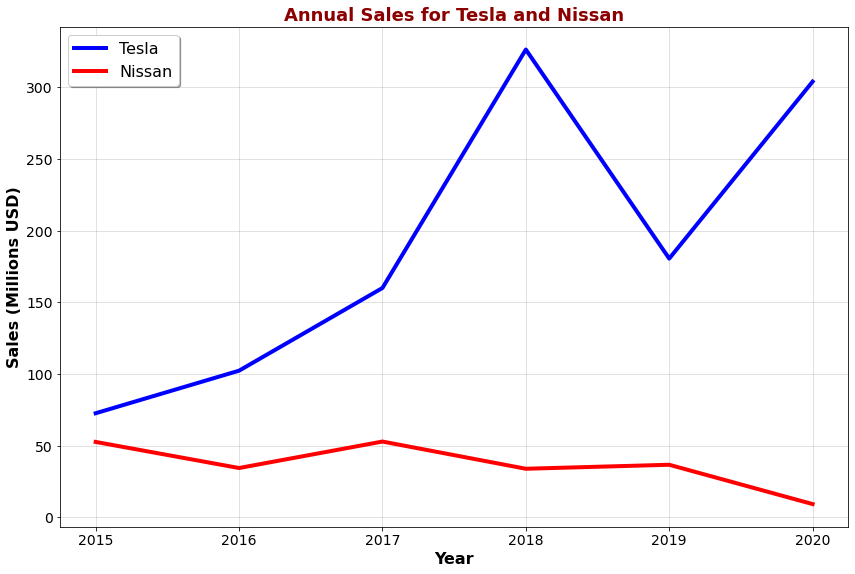

In [157]:
## Ploting Two Market Leader Sales
x_values = Two_Leader_Sales_df['Year']
y1_values = Two_Leader_Sales_df['Tesla_Annual_Sales']/1e6
y2_values = Two_Leader_Sales_df['Nissan_Annual_Sales']/1e6
labels =["Tesla","Nissan"]

fig6 = plt.figure(figsize =(12,8))
plt.title("Annual Sales for Tesla and Nissan", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Year", fontsize = 16, fontweight ='bold')
plt.ylabel("Sales (Millions USD)", fontsize = 16, fontweight ='bold')

plt.xticks(fontsize = 14, color = 'k', rotation = 0)
plt.yticks(fontsize = 14, color = 'k', rotation = 0)

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.plot(x_values, y1_values, "b", linewidth = 4)
plt.plot(x_values, y2_values, "r", linewidth = 4)
plt.legend(labels, loc="best", shadow = True, fontsize = 16)

plt.savefig("Tesla_Nissan_Sales.png")
plt.show()


In [136]:
### Up and Coming Competitor Analysis: KIA, Hyundai, Chevrolet

Kia_df = BEV_df[BEV_df['Make']=="KIA"]
Hyundai_df = BEV_df[BEV_df['Make']=="HYUNDAI"]
Chevrolet_df = BEV_df[BEV_df['Make']=="CHEVROLET"]

Kia_Sales_df = Kia_df.groupby("Model_Year").Base_MSRP.sum()
Hyundai_Sales_df = Hyundai_df.groupby("Model_Year").Base_MSRP.sum()
Chevrolet_Sales_df = Chevrolet_df.groupby("Model_Year").Base_MSRP.sum()

NextCompetitors_df = pd.merge(Kia_Sales_df, Hyundai_Sales_df, how = "left", on = 'Model_Year')
NextCompetitors_df = pd.merge(NextCompetitors_df, Chevrolet_Sales_df, how = "left", on = 'Model_Year')

new_names4 = ["Kia_Sales", "Hyundai_Sales", "Chevrolet_Sales"]
NextCompetitors_df.columns=new_names4
NextCompetitors_df.reset_index(inplace=True)
NextCompetitors_df

,Model_Year,Kia_Sales,Hyundai_Sales,Chevrolet_Sales
0,2015,"606,600.000",nan,"2,391,150.000"
1,2016,"13,227,300.000",nan,"2,110,080.000"
2,2017,"8,101,074.651","1,610,520.232","49,594,485.039"
3,2018,"2,716,000.000",nan,"16,722,770.000"
4,2019,"21,868,000.000","1,088,595.000","33,580,540.000"
5,2020,"2,801,550.000","4,825,540.000","28,865,655.000"


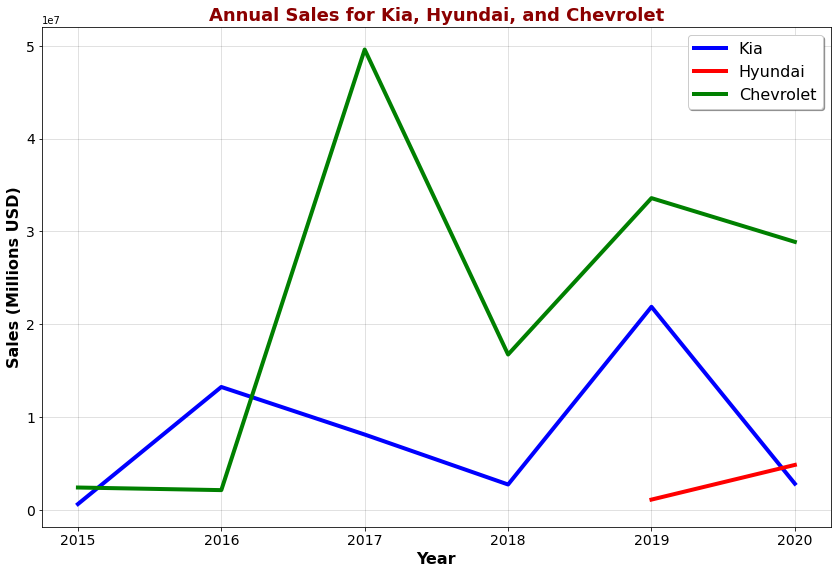

In [158]:
## Ploting Up and Comers
x_values = NextCompetitors_df['Model_Year']
y1_values = NextCompetitors_df['Kia_Sales']
y2_values = NextCompetitors_df['Hyundai_Sales']
y3_values = NextCompetitors_df['Chevrolet_Sales']

labels =["Kia","Hyundai",'Chevrolet']

fig16 = plt.figure(figsize =(12,8))
plt.title("Annual Sales for Kia, Hyundai, and Chevrolet", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("Year", fontsize = 16, fontweight ='bold')
plt.ylabel("Sales (Millions USD)", fontsize = 16, fontweight ='bold')

plt.xticks(fontsize = 14, color = 'k', rotation = 0)
plt.yticks(fontsize = 14, color = 'k', rotation = 0)

plt.grid(color='k', alpha = 0.15)

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.plot(x_values, y1_values, "b", linewidth = 4)
plt.plot(x_values, y2_values, "r", linewidth = 4)
plt.plot(x_values, y3_values, "g", linewidth = 4)

plt.legend(labels, loc="best", shadow = True, fontsize = 16)

plt.savefig("UpandComers_Sales.png")
plt.show()


### DEMOGRAPHIC STUDIES: By County, By Surface Area, By Electricity Cost

In [35]:
## Recalling Demographic Data
Rates_Population_df.head(10)

,County,Land_Surface_Area,Population,Public_Charging_Station,EVs_Per_County,Electric_Cost_KWhr
0,Adams,"1,924.980",18951,3,8,7.650
1,Asotin,636.210,21955,1,13,9.050
2,Benton,"1,700.380",182053,16,443,7.510
3,Chelan,"2,920.520",73664,14,263,3.220
4,Clallam,"1,738.330",72024,19,280,7.800
5,Clark,629.000,438272,58,2284,9.180
6,Columbia,868.630,4031,7,5,8.230
7,Cowlitz,"1,140.120",102072,31,179,7.290
8,Douglas,"1,819.260",39183,4,87,2.640
9,Ferry,"2,203.160",7657,1,7,9.370


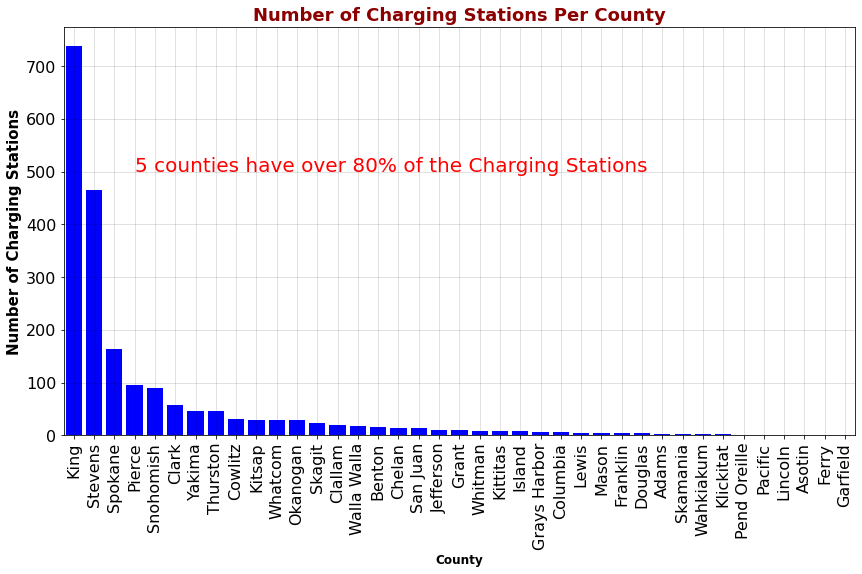

In [159]:
## Tallying Charging Stations by County

Rates_Population_df.sort_values('Public_Charging_Station', inplace =True, ascending = False)

x_axis = Rates_Population_df['County']
y_values=Rates_Population_df['Public_Charging_Station']

tick_locations = [value for value in x_axis]

fig6 = plt.figure(figsize =(12,8))

plt.bar(x_axis, y_values, color = 'b', alpha = 1.0, align = "center")
plt.title("Number of Charging Stations Per County", fontsize = 18, fontweight ='bold', color='darkred')
plt.xlabel("County", fontsize = 12, fontweight ='bold')
plt.ylabel("Number of Charging Stations", fontsize = 15, fontweight ='bold')

plt.xticks(fontsize = 16, color = 'k', rotation = 90)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.xlim(-0.5, len(x_axis)-0.5)

plt.grid(color='k', alpha = 0.15)

plt.annotate("5 counties have over 80% of the Charging Stations", xy=(3.0,500.0), size = 20, color ="red")

plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

plt.savefig("Stations_Per_County.png")
plt.show()


In [37]:
# Top Five Most Populous Counties Demographics

top5counties_df = Rates_Population_df.sort_values(by=['Public_Charging_Station'], ascending=False).head(5)
top5counties_df


,County,Land_Surface_Area,Population,Public_Charging_Station,EVs_Per_County,Electric_Cost_KWhr
16,King,"2,115.560",2008997,738,26663,10.170
32,Stevens,"2,477.760",43541,465,31,8.480
31,Spokane,"1,763.790",476950,163,876,7.260
26,Pierce,"1,669.510",812689,96,2861,8.920
30,Snohomish,"2,087.270",735351,90,4940,8.440


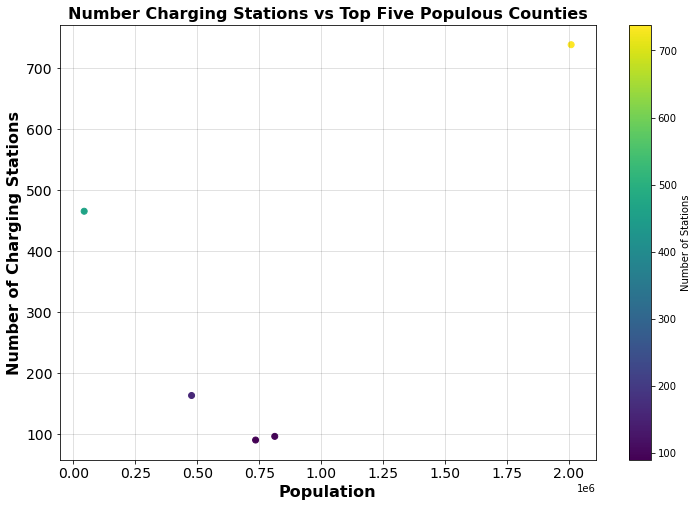

In [160]:
fig11 = plt.figure(figsize =(12,8))
plt.xticks(rotation = 0)
plt.scatter(top5counties_df['Population'], top5counties_df["Public_Charging_Station"], c = top5counties_df["Public_Charging_Station"]) 
clb = plt.colorbar()
plt.xlabel("Population",fontsize = 16, fontweight ='bold')
plt.ylabel("Number of Charging Stations",fontsize = 16, fontweight ='bold')
plt.grid(color='k', alpha = 0.15)
plt.title("Number Charging Stations vs Top Five Populous Counties", fontsize = 16, fontweight ='bold')
clb.set_label("Number of Stations")

plt.xticks(fontsize = 14, color = 'k', rotation = 0)
plt.yticks(fontsize = 14, color = 'k', rotation = 0)

plt.savefig("Scatter_EVs_Per_Top5Populations.png")
plt.show()


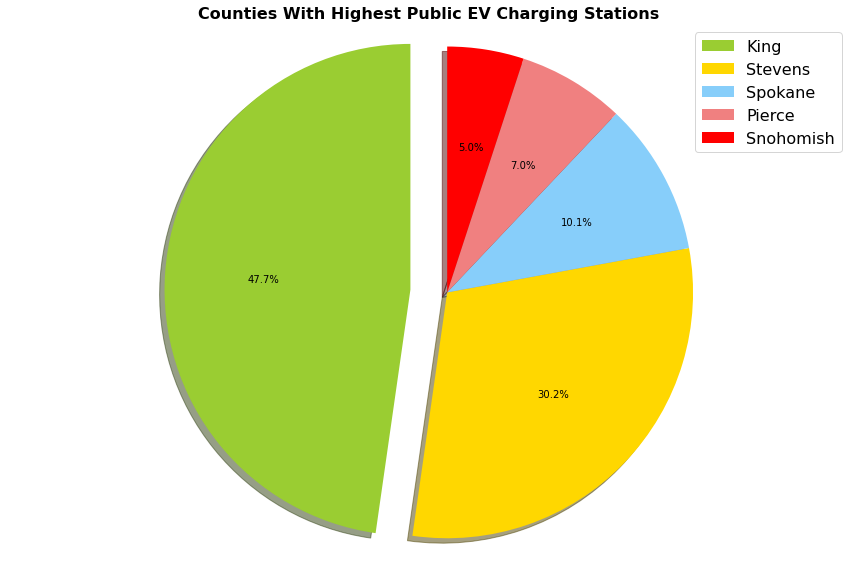

<Figure size 432x288 with 0 Axes>

In [164]:
# Top Five Counties With Public Charging Stations
fig12 = plt.figure(figsize =(12,8))
labels = ['King', 'Stevens', 'Spokane', 'Pierce','Snohomish']
sizes = [47.5, 30.0, 10.0, 7.0, 5.0]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']
explode =(0.15,0,0,0,0)
plt.pie(sizes, explode, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(labels, loc="best", fontsize = 16)
plt.title("Counties With Highest Public EV Charging Stations", fontsize = 16, fontweight ='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig("PiePlot_Top5Counties.png")

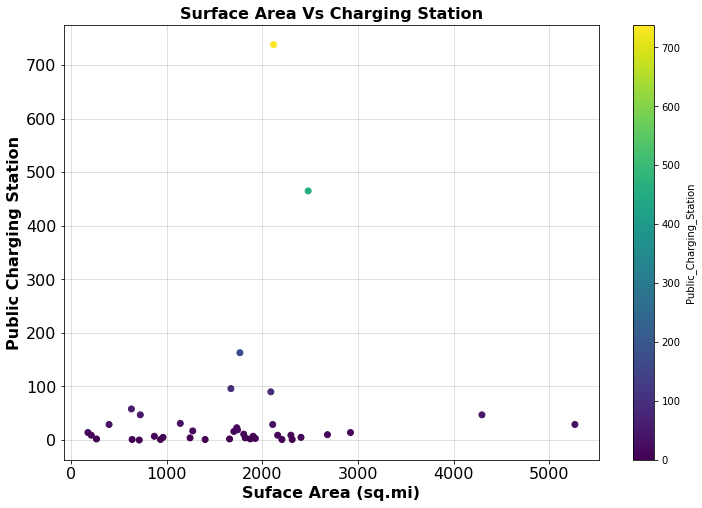

<Figure size 432x288 with 0 Axes>

In [121]:
## Charging Stations as a function of County Surface Area

fig7 = plt.figure(figsize =(12,8))
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.scatter(Rates_Population_df['Land_Surface_Area'], Rates_Population_df["Public_Charging_Station"], c = Rates_Population_df["Public_Charging_Station"]) 
clb = plt.colorbar()
plt.xlabel("Suface Area (sq.mi)",fontsize = 16, fontweight ='bold')
plt.ylabel("Public Charging Station",fontsize = 16, fontweight ='bold')
plt.grid(color='k', alpha = 0.15)
plt.title("Surface Area Vs Charging Station", fontsize = 16, fontweight ='bold')
clb.set_label("Public_Charging_Station")

plt.show()
plt.savefig("Scatter_Stations_Per_County.png")

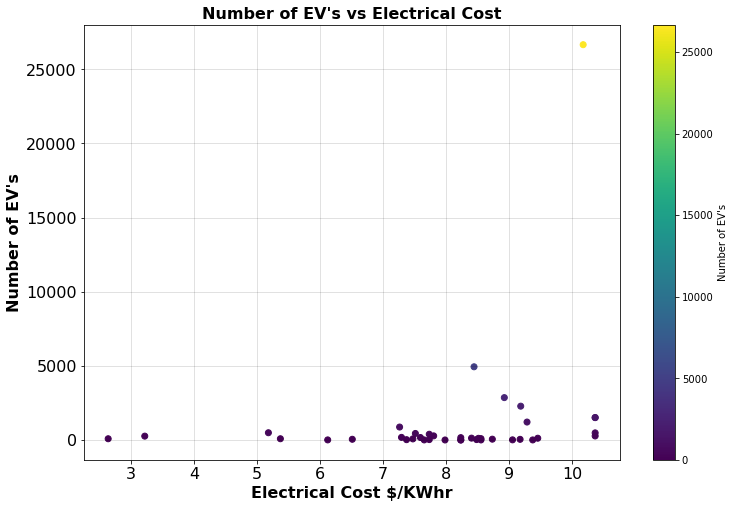

<Figure size 432x288 with 0 Axes>

In [122]:
## Number of Cars as a function of Electric Cost ($/Kwhr)

fig8 = plt.figure(figsize =(12,8))
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)


plt.scatter(Rates_Population_df['Electric_Cost_KWhr'], Rates_Population_df["EVs_Per_County"], c = Rates_Population_df["EVs_Per_County"]) 
clb = plt.colorbar()
plt.xlabel("Electrical Cost $/KWhr",fontsize = 16, fontweight ='bold')
plt.ylabel("Number of EV's",fontsize = 16, fontweight ='bold')
plt.grid(color='k', alpha = 0.15)
plt.title("Number of EV's vs Electrical Cost", fontsize = 16, fontweight ='bold')
clb.set_label("Number of EV's")

plt.show()
plt.savefig("Scatter_EVs_Per_Electrical.png")

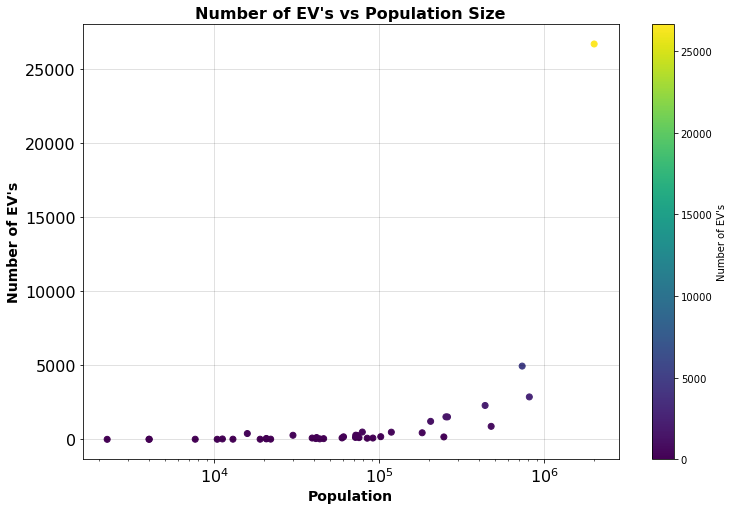

<Figure size 432x288 with 0 Axes>

In [124]:
## Number of Electrical Cars vs Size of the Population

fig9 = plt.figure(figsize =(12,8))
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.scatter(Rates_Population_df['Population'], Rates_Population_df["EVs_Per_County"], c = Rates_Population_df["EVs_Per_County"]) 
clb = plt.colorbar()
plt.xlabel("Population",fontsize = 14, fontweight ='bold')
plt.ylabel("Number of EV's",fontsize = 14, fontweight ='bold')
plt.grid(color='k', alpha = 0.15)
plt.title("Number of EV's vs Population Size", fontsize = 16, fontweight ='bold')
clb.set_label("Number of EV's")
plt.xscale("log")

plt.show()
plt.savefig("Scatter_EVs_Per_Population.png")

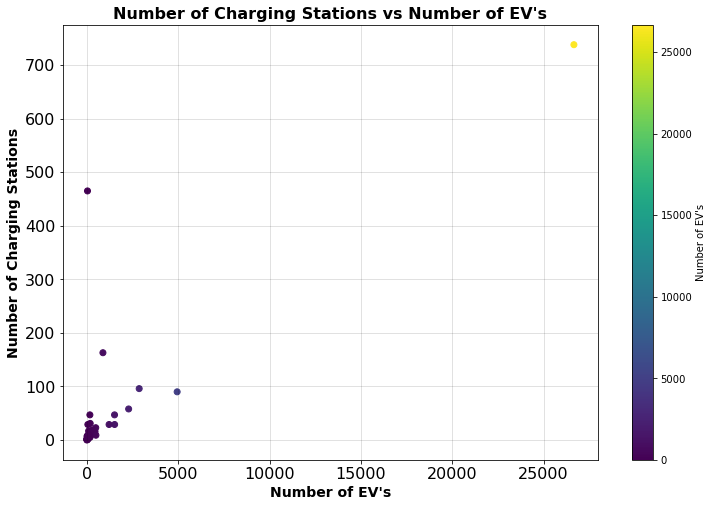

<Figure size 432x288 with 0 Axes>

In [161]:
## Number of Electrical Cars vs # Charging Stations

fig10 = plt.figure(figsize =(12,8))
plt.xticks(fontsize = 16, color = 'k', rotation = 0)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

plt.scatter(Rates_Population_df["EVs_Per_County"], Rates_Population_df["Public_Charging_Station"], c = Rates_Population_df["EVs_Per_County"]) 
clb = plt.colorbar()
plt.xlabel("Number of EV's",fontsize = 14, fontweight ='bold')
plt.ylabel("Number of Charging Stations",fontsize = 14, fontweight ='bold')
plt.grid(color='k', alpha = 0.15)
plt.title("Number of Charging Stations vs Number of EV's", fontsize = 16, fontweight ='bold')
clb.set_label("Number of EV's")
#plt.xscale("log")

plt.show()
plt.savefig("Scatter_EVs_Per_ChargingStations.png")

### Key Takeaways

In [ ]:
## Range is the main driver of sales according to this analysis for the state of Washington

## Price of the vehicle is likely to influence certain segments of the consumer market. This cou